# Neural Networks - Regression

In this tutorial, we will create a regression model, that predicts the fuel efficiency in miles per gallon (MPG). This is a continuous value, in contrast with a classification model where a class is predicted.

## 0. Import python modules

We will use the Tensoflow/Keras framework for neural network machine learning.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from plot_loss import plot_loss # own function in plot_loss.py

## 1. Load the dataset

We read the dataset using pandas. The dataset is available from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/).

In [2]:
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']
dataset = pd.read_csv("../datasets/auto-mpg.csv", names=column_names, na_values='?', sep=' ', comment='\t', skipinitialspace=True)

In [3]:
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


## 2. Data cleaning and normalisation

The dataset contains a few unknown values which we will drop.

In [4]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [5]:
dataset = dataset.dropna()

We separate the input features `x` from the target values `y`.

In [6]:
x = dataset[["Cylinders","Displacement", "Horsepower", "Weight", "Acceleration", "Model Year"]]
y = dataset[['MPG']]

We now normalize the inputs using the `MinMaxScaler.` It is good practice always to do this so that all the features get the same scale and range (which is not the case in this dataset).

In [7]:
x.describe()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [8]:
scaler = MinMaxScaler()
x_norm = scaler.fit_transform(x)

Next, we will split the data into a training and a test dataset.

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x_norm,y,test_size=0.1) 

## 3. Define the model

The input layer has 6 nodes, corresponding to the number of input features. We choose 2 hidden layers with 64 nodes and a `relu` activation function (feel free to try other values/functions). The output layer has 1 node corresponding to the one MPG value to predict. For regression models, a `linear` activation function is often used in the output layer. We choose Adam as optimizer with a learning rate of `0.001`. The loss is the `MSE` loss which is often used for regression models. We also define a `mean_absolute_percentage_error` metric.

In [20]:
# input layer 6 nodes
inputs = Input(shape=(6,))
# 2 hidden layer
x = Dense(64, activation='relu')(inputs)
x = Dense(64, activation='relu')(x)
# output layer
outputs = Dense(1, activation='linear')(x)
# construct the model
model = Model(inputs, outputs, name='auto-mpg')
# print a summary
model.summary()
# compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mean_squared_error',
    metrics=['mean_absolute_percentage_error']
)

Model: "auto-mpg"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 6)]               0         
                                                                 
 dense_9 (Dense)             (None, 64)                448       
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4673 (18.25 KB)
Trainable params: 4673 (18.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 4. Train the model

We train the model for 100 epochs, with a batch size of 32 (feel free to try other values). We take 10% of the training dataset for validation data.

Epoch 1/100
10/10 [==============================] - 1s 20ms/step - loss: 587.1245 - mean_absolute_percentage_error: 99.2447 - val_loss: 799.3571 - val_mean_absolute_percentage_error: 98.2653
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 571.3129 - mean_absolute_percentage_error: 97.3583 - val_loss: 780.0871 - val_mean_absolute_percentage_error: 96.3290
Epoch 3/100
10/10 [==============================] - 0s 5ms/step - loss: 552.5280 - mean_absolute_percentage_error: 95.0070 - val_loss: 755.0974 - val_mean_absolute_percentage_error: 93.6562
Epoch 4/100
10/10 [==============================] - 0s 5ms/step - loss: 526.5543 - mean_absolute_percentage_error: 91.6338 - val_loss: 719.7535 - val_mean_absolute_percentage_error: 89.6901
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 489.6801 - mean_absolute_percentage_error: 86.5930 - val_loss: 668.6818 - val_mean_absolute_percentage_error: 83.7180
Epoch 6/100
10/10 [=========================

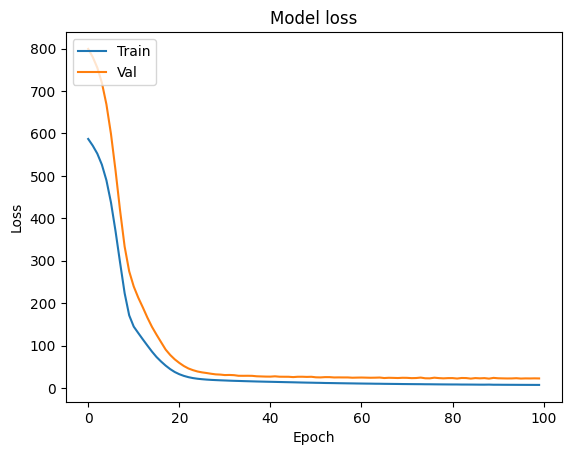

In [21]:
# train the model
history = model.fit(
    x_train, # training input
    y_train, # training targets
    epochs=100,
    batch_size=32,
    validation_split=0.1,
)
# plot loss function
plot_loss(history)

## 5. Evaluate the model

Now we evaluate our model with the test data, which has not been used during training. Have a look at the MAE.

In [22]:
# evaluate
model.evaluate(x_test,y_test)

2/2 [==============================] - 0s 16ms/step - loss: 5.0650 - mean_absolute_percentage_error: 7.5573


[5.064994812011719, 7.557276248931885]

## 6. Use the model to predict

We can start using the model to predict the MPG. Here we predict the complte test dataset. 

In [23]:
# predict 
y_predicted = model.predict(x_test)

2/2 [==============================] - 0s 0s/step


We plot the predicted values against the true value.

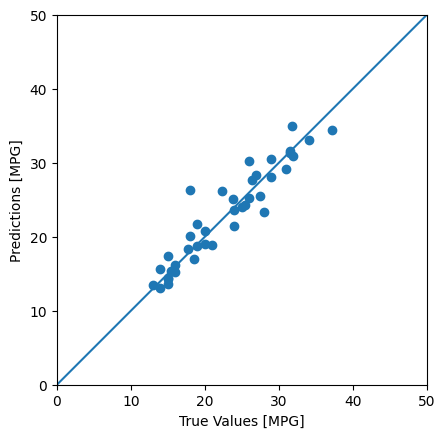

In [24]:
a = plt.axes(aspect='equal')
plt.scatter(y_test, y_predicted)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims, lims)

We plot the error distribution.

Text(0, 0.5, 'Count')

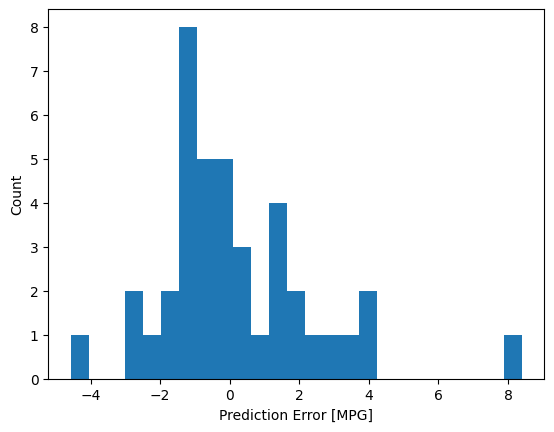

In [25]:
error = y_predicted - y_test
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
plt.ylabel('Count')